In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [12]:
train_features = train_df.iloc[:,train_df.columns != 'label']
train_labels = train_df.iloc[:,train_df.columns == 'label']
train_labels = train_labels.values.reshape(-1)

test_features = test_df.iloc[:,test_df.columns != 'label']
test_labels = test_df.iloc[:,test_df.columns == 'label']
test_labels = test_labels.values.reshape(-1)

In [13]:
test_labels.shape

(7172,)

In [28]:
def pretty_print(image_example):
    """ Pretty prints a Fashion MNIST example.

    Parameters:
        image_example: a 1x784 numpy array corresponding to the features of
                       a single image.

    Returns:
        None.
    """
    print(np.array_str(image_example, precision=1, max_line_width=116))


Dimensions of training set feature matrix: (27455, 784)
Dimensions of training set label matrix: (27455,)
[137 138 139 139 140 140 140 140 141 140 140 141 140 140 139 138 138 137 137 135 133 132 132 131 130 129 128 128
 141 141 141 142 143 142 143 144 143 143 143 142 141 141 140 139 138 139 136 136 135 133 132 132 131 129 130 129
 145 145 146 147 147 146 146 147 147 146 146 145 144 144 143 142 141 139 149 124 127 137 134 133 132 132 131 129
 149 149 150 151 151 151 151 151 150 150 150 149 148 147 146 144 144 141 167 118 103 142 134 134 134 133 131 130
 152 153 153 154 155 154 154 154 154 154 153 153 152 150 149 148 147 146 168 124  97 142 137 137 136 134 133 132
 157 158 158 158 158 158 158 158 158 158 157 156 155 154 152 152 150 150 168 120  93 144 141 139 138 136 135 133
 161 162 162 162 163 162 161 162 162 161 160 159 158 157 156 155 153 153 169 120  92 147 144 142 141 139 137 135
 165 165 165 165 166 167 165 165 165 165 164 163 162 161 159 159 157 158 175 128 108 150 148 145 144 14

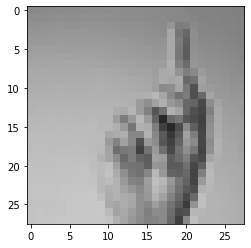

In [42]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

print("Dimensions of training set feature matrix:", train_features.shape)
print("Dimensions of training set label matrix:", train_labels.shape)

EXAMPLE_INDEX = np.random.randint(27455)
pretty_print(train_features.iloc[EXAMPLE_INDEX].values)

plt.figure()
plt.imshow(train_features.iloc[EXAMPLE_INDEX].values.reshape(28,28),cmap='gray', vmin=0, vmax=255)
plt.show()



In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

s_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components = 0.95)),
        ('knn', KNeighborsClassifier())
    ])

s_param_grid = {'knn__n_neighbors': [1,3,5,7,9,11],
              'knn__p': [1,2], 
              'knn__weights': ['uniform','distance']}

sknn = GridSearchCV(s_pipeline, s_param_grid, cv=5, n_jobs = -1)
sknn.fit(train_features, train_labels)

KeyboardInterrupt: 

In [ ]:
sknn.score(test_features,test_labels)

In [ ]:
sknn.best_params_